<a href="https://colab.research.google.com/github/JannsenRamos/AlbertJannsenRamos/blob/main/ALL_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports Block

In [ ]:
# Install necessary packages
!pip install sentence-transformers transformers scikit-learn faiss-cpu pandas

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from transformers import pipeline
import faiss

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

EVALUATION FOR SENTIMENT ANALYSIS

FIRST STEP: MAPPING THE SENTIMENTS

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

# Load dataset
df = pd.read_csv("Training_Dataset.csv")

# Normalize sentiment labels
label_mapping = {
    'Positive': 'POSITIVE',
    'Negative': 'NEGATIVE'
}

SECOND STEP: GET EXAMPLE PREDICTIONS FROM THE MODEL

In [ ]:
if 'sentiment' in df.columns:
    if not all(label in ['POSITIVE', 'NEGATIVE'] for label in df['sentiment'].unique()):
        df['ground_truth'] = df['sentiment'].map(label_mapping)
    else:
        df['ground_truth'] = df['sentiment']
else:
    print("Warning: No sentiment column found in dataset")

# Split dataset: 10% test, 90% train+val
train_val_df, test_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['ground_truth'])

# Split train+val: 80% train, 20% val
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42, stratify=train_val_df['ground_truth'])

# Load sentiment model
sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to get model predictions
def get_predictions(texts):
    results = sentiment_model(texts)
    return [result['label'] for result in results]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Function to evaluate and plot
def evaluate_model(ground_truth, predictions, title=""):
    accuracy = accuracy_score(ground_truth, predictions)
    precision = precision_score(ground_truth, predictions, pos_label='POSITIVE')
    recall = recall_score(ground_truth, predictions, pos_label='POSITIVE')
    f1 = f1_score(ground_truth, predictions, pos_label='POSITIVE')

    print(f"\nEvaluation Results - {title}")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    cm = confusion_matrix(ground_truth, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{title.lower().replace(" ", "_")}.png')
    plt.close()

# Evaluate on each split
for split_name, split_df in [("Training Set", train_df), ("Validation Set", val_df), ("Unseen Test Set", test_df)]:
    print(f"\nRunning sentiment analysis on {split_name} ({len(split_df)} samples)...")
    split_df = split_df.copy()  # avoid SettingWithCopyWarning
    split_df['predicted_sentiment'] = get_predictions(split_df['review'].tolist())
    evaluate_model(split_df['ground_truth'], split_df['predicted_sentiment'], title=split_name)


Running sentiment analysis on Training Set (8992 samples)...

Evaluation Results - Training Set
Accuracy:  0.9131
Precision: 0.9671
Recall:    0.9079
F1 Score:  0.9366

Running sentiment analysis on Validation Set (2249 samples)...

Evaluation Results - Validation Set
Accuracy:  0.9080
Precision: 0.9570
Recall:    0.9106
F1 Score:  0.9332

Running sentiment analysis on Unseen Test Set (1250 samples)...

Evaluation Results - Unseen Test Set
Accuracy:  0.9272
Precision: 0.9681
Recall:    0.9275
F1 Score:  0.9474


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def redo_evaluation_code(sample_df, evaluate_model, sentiment_model, split_name=""):

    metrics = None
    sample_predictions = None
    misclassified = None

    if 'ground_truth' in sample_df.columns:
        print(f"\n--- {split_name} ---")

        # Evaluation
        metrics = evaluate_model(sample_df['ground_truth'], sample_df['predicted_sentiment'], title=split_name)
        print("\nEvaluation Metrics:")
        for k, v in metrics.items():
            if k != 'confusion_matrix':
                print(f"{k.capitalize()}: {v:.4f}")

        # Sample predictions
        print("\nSample Predictions:")
        sample_predictions = sample_df[['review', 'ground_truth', 'predicted_sentiment']].sample(min(10, len(sample_df)), random_state=42)
        print(sample_predictions)

        # Misclassified
        misclassified = sample_df[sample_df['ground_truth'] != sample_df['predicted_sentiment']]
        total_misclassified = len(misclassified)
        total_samples = len(sample_df)
        print(f"\nMisclassified: {total_misclassified} out of {total_samples} ({total_misclassified / total_samples * 100:.2f}%)")

        if total_misclassified > 0:
            print("\nSample Misclassified Examples:")
            print(misclassified[['review', 'ground_truth', 'predicted_sentiment']].sample(min(5, total_misclassified), random_state=42))
    else:
        print("Error: Ground truth labels not available for evaluation")

    # Confidence scores
    def analyze_confidence(texts):
        results = sentiment_model(texts)
        return [result['score'] for result in results]

    sample_df['confidence'] = analyze_confidence(sample_df['review'].tolist())

    # Plot confidence distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=sample_df, x='confidence', hue='predicted_sentiment', bins=20, kde=True)
    plt.title(f'Model Confidence Distribution - {split_name}')
    plt.xlabel('Confidence Score')
    plt.ylabel('Count')
    plt.tight_layout()
    filename = f'confidence_distribution_{split_name.lower().replace(" ", "_")}.png'
    plt.savefig(filename)
    plt.close()

    return metrics, sample_predictions, misclassified


In [ ]:
sample_df = val_df.copy()
sample_df['predicted_sentiment'] = get_predictions(sample_df['review'].tolist())
sample_df['confidence'] = [r['score'] for r in sentiment_model(sample_df['review'].tolist())]

In [ ]:
  if 'ground_truth' in sample_df.columns:
        # Add correctness column
        sample_df['correct_prediction'] = sample_df['ground_truth'] == sample_df['predicted_sentiment']

        # Boxplot: Confidence vs Correctness
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=sample_df, x='correct_prediction', y='confidence')
        plt.title(f'Model Confidence vs. Prediction Correctness - {split_name}')
        plt.xlabel('Prediction Correct')
        plt.ylabel('Confidence Score')
        plt.tight_layout()
        plt.savefig(f'confidence_vs_correctness_{split_name.lower().replace(" ", "_")}.png')
        plt.close()

        # Accuracy by confidence threshold
        import numpy as np
        thresholds = np.arange(0.5, 1.0, 0.05)
        accuracy_by_threshold = []

        for threshold in thresholds:
            high_conf = sample_df[sample_df['confidence'] >= threshold]
            if len(high_conf) > 0:
                acc = accuracy_score(high_conf['ground_truth'], high_conf['predicted_sentiment'])
                coverage = len(high_conf) / len(sample_df)
                accuracy_by_threshold.append((threshold, acc, coverage))

        if accuracy_by_threshold:
            thresholds_df = pd.DataFrame(accuracy_by_threshold,
                                         columns=['Threshold', 'Accuracy', 'Coverage'])

            print(f"\nAccuracy by Confidence Threshold - {split_name}:")
            print(thresholds_df)

            # Plot accuracy and coverage
            plt.figure(figsize=(10, 6))
            plt.plot(thresholds_df['Threshold'], thresholds_df['Accuracy'], marker='o', label='Accuracy')
            plt.plot(thresholds_df['Threshold'], thresholds_df['Coverage'], marker='o', label='Coverage')
            plt.xlabel('Confidence Threshold')
            plt.ylabel('Value')
            plt.title(f'Accuracy and Coverage by Confidence Threshold - {split_name}')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.savefig(f'threshold_analysis_{split_name.lower().replace(" ", "_")}.png')
            plt.close()


Accuracy by Confidence Threshold - Unseen Test Set:
   Threshold  Accuracy  Coverage
0       0.50  0.907959  1.000000
1       0.55  0.908241  0.998221
2       0.60  0.910595  0.994664
3       0.65  0.911500  0.989773
4       0.70  0.913318  0.984882
5       0.75  0.917235  0.977768
6       0.80  0.919945  0.971988
7       0.85  0.921803  0.966652
8       0.90  0.929472  0.951979
9       0.95  0.937710  0.927968


USED FOR PROCESSING THE NEGATIVE REVIEWS

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

# Load your dataset
df = pd.read_csv('Raw_Dataset')  # Change to your file path

# Drop rows with any null or missing values
df.dropna(inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Define stop words
stop_words = set(stopwords.words('english'))

# Clean text column (change 'text' to your actual text column name)
def clean_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove stopwords
        words = text.split()
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)
    return text

# Apply cleaning to the text column
df['review'] = df['review'].apply(clean_text)

# Save cleaned dataset
df.to_csv('Raw_Dataset.csv', index=False)

print("Dataset cleaned and saved as 'Raw_Dataset.csv'")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset cleaned and saved as 'cleaned_dataset.csv'


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Raw_Dataset.csv')  # Replace with your actual filename

# Drop rows with missing values in 'text' or 'sentiment'
df.dropna(subset=['review', 'sentiment'], inplace=True)

# Drop rows with missing values in 'text' or 'sentiment'
df.dropna(subset=['review', 'sentiment'], inplace=True)

# Remove rows where text has more than 512 characters
df = df[df['review'].str.len() <= 512]

# Drop duplicate rows (optional, but often useful)
df.drop_duplicates(inplace=True)

# Save the cleaned dataset
df.to_csv('Raw_Dataset.csv', index=False)

VADER with Human Labeled Annotations

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

In [ ]:
# Download VADER lexicon (only needed the first time)
nltk.download('vader_lexicon')

# Load your CSV dataset
df = pd.read_csv("cleaned_dataset.csv")

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df.head()

,review,sentiment
0,bought syrup hoping able make coffee lattes ho...,Negative
1,maxwell house ground coffee supermarket beter ...,Negative
2,owned keurig brewer 2 years never problem kcup...,Negative
3,bought coffee several people also liked favori...,Negative
4,love coffee bought also bought another brand p...,Negative


In [ ]:
# Function to validate sentiment
def validate_sentiment(row):
    score = sia.polarity_scores(row["review"])["compound"]
    predicted = "Positive" if score >= 0 else "Negative"
    return pd.Series([score, predicted, "Match" if predicted == row["sentiment"] else "Mismatch"],
                     index=["sentiment_score", "predicted_sentiment", "validation_result"])

# Apply validation function and store results in new columns
df[["sentiment_score", "predicted_sentiment", "validation_result"]] = df.apply(validate_sentiment, axis=1)

# Optional: Print summary
print("Validation Summary:")
print(df["validation_result"].value_counts())

# Extract misclassified examples into a new dataframe
misclassified_df = df[df["validation_result"] == "Mismatch"]

# Optional: Show a few misclassified samples with sentiment scores
print("\nSample Mismatches:")
print(misclassified_df[["review", "sentiment", "predicted_sentiment", "sentiment_score", "validation_result"]].head())

# Save the full validated dataset
df.to_csv("validated_sentiment_dataset.csv", index=False)
print("\n✅ Saved as 'validated_sentiment_dataset.csv'")

# Save misclassified examples to a separate CSV
misclassified_df.to_csv("misclassified_sentiments.csv", index=False)
print("\n⚠️ Saved misclassified instances as 'misclassified_sentiments.csv'")


Validation Summary:
validation_result
Match       9631
Mismatch    2860
Name: count, dtype: int64

Sample Mismatches:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     review  \
1                                                                                                                                                                                                                                                                                                                                                           maxwell house ground coffee supermarket beter coffee se

MODEL

In [ ]:
# Load dataset
df = pd.read_csv("Coffee_Recos.csv") #CSV of Coffees to be Recommended
reviews = df["review"].dropna().tolist()
coffee_names = df["coffee_name"].dropna().tolist()

# Load models
embedding_model = SentenceTransformer("all-MiniLM-L6-v2") # model used for index embeddings for semantic search
sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english") # model used for sentiment analysis pre-trained using SST-2

# Embed reviews
review_embeddings = embedding_model.encode(reviews, convert_to_numpy=True)

# Build FAISS index for review embeddings
dimension = review_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(review_embeddings)

def recommend(user_input, top_k=5):
    # 1. Analyze sentiment
    sentiment = sentiment_model(user_input)[0]
    print(f"Sentiment: {sentiment['label']} ({sentiment['score']:.2f})")

    # 2. Embed user input
    user_embedding = embedding_model.encode([user_input], convert_to_numpy=True)

    # 3. Search similar reviews
    distances, indices = index.search(user_embedding, k=len(reviews))

    # 4. Select recommendations based on sentiment
    if sentiment['label'] == "POSITIVE":
        selected_indices = indices[0][:top_k]  # Most similar
    else:
        selected_indices = indices[0][-top_k:]  # Least similar (opposite taste)

    # 5. Prepare recommendations with coffee names
    recommendations = []
    for i in selected_indices:
        recommendations.append({
            "index": i,
            "coffee_name": coffee_names[i],
            "review": reviews[i]
        })

    return recommendations

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
user_query = "I want a rich bold coffee"
results = recommend(user_query, top_k=3)

for rec in results:
    print(f"Index: {rec['index']}, Coffee: {rec['coffee_name']}\nReview: {rec['review']}\n")

Sentiment: POSITIVE (1.00)
Index: 7979, Coffee: Folgers Aroma Roasted
Review: I 'd call this heavy-bodied coffee rich if there was anything to be rich. The aroma is pleasantly sweet, but the cup displays -- quite literally -- no flavor whatsoever, only primary taste sensation, a sort of heavy emptiness with insinuations of bitterness and sweetness.

Index: 7929, Coffee: Costa Rica Taparto
Review: A big, centered, complete Central-America- style coffee. Brightly acidy in the upper ranges, richly sweet in the lower, with hints of flowers and cedar in the nose and distinct chocolate in the finish. Displayed its true character as it cooled -- rather than falling apart, it opened up, revealing still more nuance.

Index: 8108, Coffee: Holiday Blend
Review: A compromise coffee between dark and medium roast, pleasantly low-key, but not much range or dimension.



Semantic Search Evaluation

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
def evaluate_semantic_search(queries, ground_truth, index, embedding_model, top_k=5):
    precisions = []
    recalls = []
    average_precisions = []  #

    for query in queries:
        # Embed the query
        query_embedding = embedding_model.encode([query], convert_to_numpy=True)

        # Search top_k results in FAISS index
        distances, indices = index.search(query_embedding, k=top_k)
        retrieved_indices = indices[0]

        # Get relevant indices from ground truth
        relevant_indices = ground_truth.get(query, set())

        # Create binary relevance vector for retrieved docs (1 if relevant, else 0)
        y_true = [1 if idx in relevant_indices else 0 for idx in retrieved_indices]

        # Precision@k
        precision = sum(y_true) / top_k if top_k > 0 else 0

        # Recall@k
        recall = sum(y_true) / len(relevant_indices) if relevant_indices else 0

        # Average Precision (AP)
        # Use negative distances as scores because FAISS returns L2 distances (lower is better)
        if sum(y_true) > 0:
            ap = average_precision_score(y_true, -distances[0])
        else:
            ap = 0

        precisions.append(precision)
        recalls.append(recall)
        average_precisions.append(ap)  # Ensure consistency

    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    mean_ap = np.mean(average_precisions)  # No error here now

    return {
        "avg_precision": avg_precision,
        "avg_recall": avg_recall,
        "mean_average_precision": mean_ap
    }

In [ ]:
ground_truth = {
    "rich chocolate coffee": {7308, 7344, 7477},
    "light fruity coffee": {7403, 7662, 7790},
    "bold espresso": {4411, 5532, 6594},
    "smooth caramel flavor": {7598, 4934,663},
    "floral aroma": {6295, 5857, 7418},
    "bright acidity": {6128, 8133, 8267},
    "earthy and smoky": {2496, 8080, 5107},
    "balanced citrus": {6105, 5852, 6709},
    "vanilla undertones": {8237, 8166, 8201}
}
queries = list(ground_truth.keys())

In [ ]:
results = evaluate_semantic_search(
    queries=queries,
    ground_truth=ground_truth,
    index=index,
    embedding_model=embedding_model,
    top_k=5
)

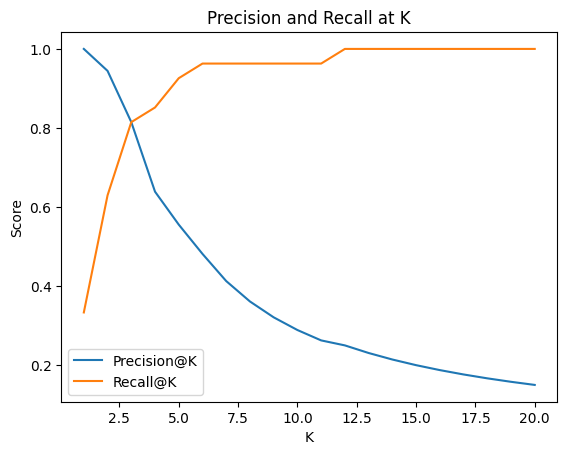

In [ ]:
import matplotlib.pyplot as plt

ks = list(range(1, 21))
precision_at_k = []  # List of average precision values at each k
recall_at_k = []     # List of average recall values at each k

for k in ks:
    results = evaluate_semantic_search(queries, ground_truth, index, embedding_model, top_k=k)
    precision_at_k.append(results['avg_precision'])
    recall_at_k.append(results['avg_recall'])

plt.plot(ks, precision_at_k, label='Precision@K')
plt.plot(ks, recall_at_k, label='Recall@K')
plt.xlabel('K')
plt.ylabel('Score')
plt.title('Precision and Recall at K')
plt.legend()
plt.savefig('precision_recall_at_k.png')
plt.show()
